**importing the libraries needed**


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
#for understanding data
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('customer_data.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### understanding data

In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
#customer id is not important so we can drop it
data.drop("CustomerID", axis=1, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Data Analysis

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


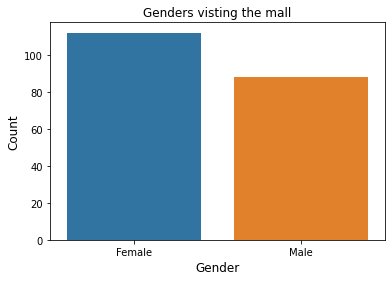

In [12]:
#genders visting our mall
gender_count = data['Gender'].value_counts(dropna = False)
sns.barplot(gender_count.index, gender_count.values, alpha = 1)
plt.title('Genders visting the mall')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

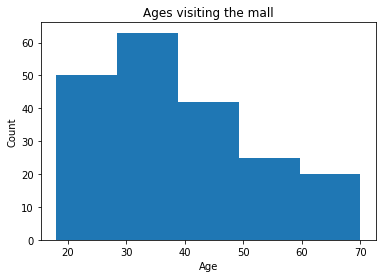

In [13]:
#ages of the customers
plt.hist(data['Age'], bins=5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages visiting the mall')
plt.show()

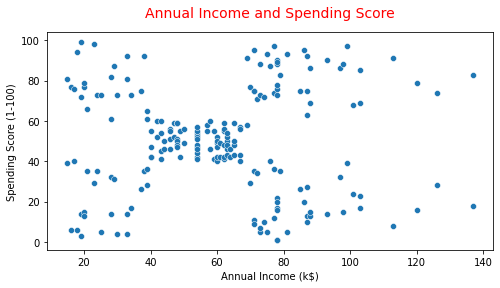

In [14]:
#Annual income and spending score plotting
plt.figure(figsize=(8,4))
sns.scatterplot(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'])
plt.title('Annual Income and Spending Score', size=14, pad=15.0, color='Red');

Using Kmean to find the clusters

C:\Users\yasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

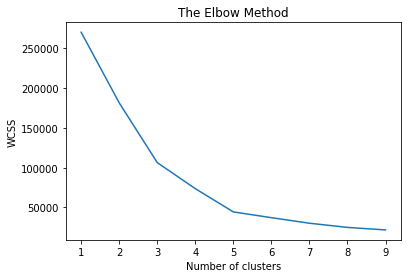

In [15]:
#choosing annual income & spending score
AI_SS= data.iloc[:, [2, 3]].values
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(AI_SS)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
Kmodel = KMeans(n_clusters = 5)
Kmodel.fit(AI_SS)
y_pred = Kmodel.predict(AI_SS)

C:\Users\yasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
#getting the centeroids
centroid = Kmodel.cluster_centers_
centroid

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

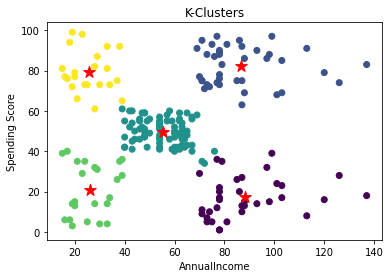

In [18]:
plt.scatter(data.iloc[:,2],data.iloc[:,3],c=y_pred)
plt.scatter(centroid[:,0],centroid[:,1],marker='*',color='red',s=150)
plt.xlabel('AnnualIncome')
plt.ylabel('Spending Score')
plt.title('K-Clusters')
plt.show()

In [19]:
#Adding the clusters to the data frame
data['Class'] = y_pred
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
